In [14]:
import random
import time
import sys
import timeit
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

/Users/madhurark/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Multiplication of 2 large integers using regular multiplication digit by digit

In [1]:
def digit_by_digit_multiply(x,y):
    if len(x)<len(y):
        n1=x
        n2=y
    else:
        n1=y
        n2=x

    n1=n1[::-1]
    n2=n2[::-1]
    res=0
    for i in range(len(n1)):
        c=0
        tres=""
        for j in range(len(n2)):
            temp=int(n1[i])*int(n2[j])
            d=(temp+c)%10
            tres+=str(d)
            c=temp//10
        if c > 0:
            tres += str(c)
        res+=int(tres[::-1]) * (10 ** i)    
    print(res)
digit_by_digit_multiply("22","69")
        

1518


### Q1: Long Multiplication

In [7]:
def long_multiplication(num1, num2):
    # strings to list of int
    num1 = [int(digit) for digit in num1]
    num2 = [int(digit) for digit in num2]

    # result array
    result = [0] * (len(num1) + len(num2))

    # Perform multiplication digit by digit
    for i in range(len(num1) - 1, -1, -1):
        for j in range(len(num2) - 1, -1, -1):
            product = num1[i] * num2[j]
            position = i + j + 1
            result[position] += product
            result[position - 1] += result[position] // 10
            result[position] %= 10

    # to string and removal of leading zeros
    result_str = ''.join(map(str, result)).lstrip('0')
    return result_str if result_str else '0'
long_multiplication("27632718938473758892491384367829093874829032","1274983873763778286878298392476289901")

'35231271034800992554233855506721356869875170770971773388984806787078570043205832'

### Q2: Karatsuba Multiplication

In [18]:
def karatsuba_multiplication(num1, num2):
    # Base case: if small numbers, then direct multiplication
    if len(num1) == 1 and len(num2) == 1:
        return str(int(num1) * int(num2))

    # Make numbers same length by padding with zeros
    max_len = max(len(num1), len(num2))
    num1 = num1.zfill(max_len)
    num2 = num2.zfill(max_len)

    # Split into halves
    mid = max_len // 2
    high1, low1 = num1[:-mid], num1[-mid:]
    high2, low2 = num2[:-mid], num2[-mid:]

    # Recursively calculate products
    ab = karatsuba_multiplication(low1, low2)
    z = karatsuba_multiplication(str(int(low1) + int(high1)), str(int(low2) + int(high2)))
    cd = karatsuba_multiplication(high1, high2)

    # Combine: Ahigh * Bhigh * 10^n + (A*B - Ahigh * Bhigh -Alow * Blow )* 10^(n/2)+ Alow * Blow[Karatsuba]
    result = int(cd) * 10**(2 * mid) + (int(z) - int(cd) - int(ab)) * 10**mid + int(ab)
    return str(result)


In [19]:
def generate_random_digits(length=50000):
    """Generate a random string of digits of specified length."""
    return ''.join(random.choice('0123456789') for _ in range(length))

# Generate the random digits
num1 = generate_random_digits()
num2 = generate_random_digits()
starttime = timeit.default_timer()
karatsuba_multiplication(num1,num2)
endtime = timeit.default_timer()
print(endtime-starttime)

102.37297737500012


### Q3: Plot of Kartsuba V/S Long Multiplication

In [ ]:
def generate_random_number(length):
    return ''.join(random.choices('123456789', k=1) + random.choices('0123456789', k=length - 1))

def measure_runtime(multiplication_method, num1, num2):
    start_time = time.time()
    multiplication_method(num1, num2)
    return time.time() - start_time

n_values = range(500, 5001, 500)
long_times = []
karatsuba = []

for n in n_values:
    long_time_sum = 0
    karatsuba_time_sum = 0
    for _ in range(10):
        num1 = generate_random_number(n)
        num2 = generate_random_number(n)
        long_time_sum += measure_runtime(long_multiplication, num1, num2)
        karatsuba_time_sum += measure_runtime(karatsuba_multiplication, num1, num2)
    long_times.append(long_time_sum / 10)
    karatsuba.append(karatsuba_time_sum / 10)



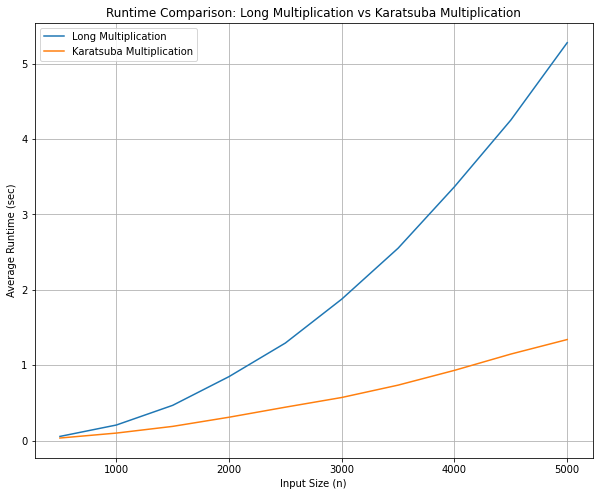

In [10]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(n_values, long_times, label='Long Multiplication')
plt.plot(n_values, karatsuba, label='Karatsuba Multiplication')
plt.xlabel('Input Size (n)')
plt.ylabel('Average Runtime (sec)')
plt.title('Runtime Comparison: Long Multiplication vs Karatsuba Multiplication')
plt.legend()
plt.grid(True)
plt.show()


### Q4: Fitting Curves to both the muliplications

In [16]:
def power_function(n, a, c):
    return a * (n**c)

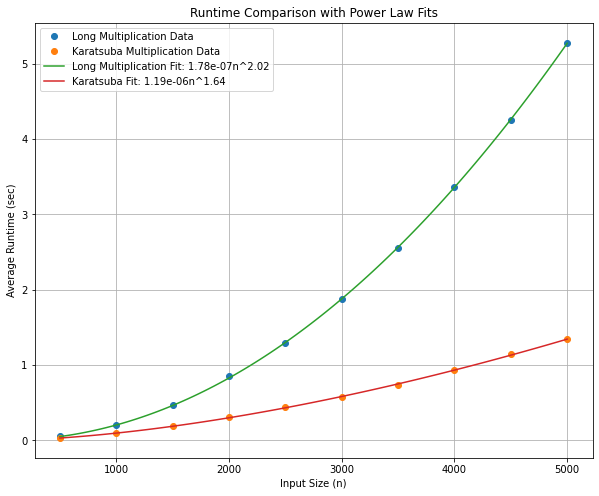

Long Multiplication: Runtime ≈ 1.78e-07 × n^2.02
Karatsuba Multiplication: Runtime ≈ 1.19e-06 × n^1.64


In [17]:
long_params, _ = curve_fit(power_function, n_values, long_times)
karatsuba_params, _ = curve_fit(power_function, n_values, karatsuba)
a_long, c_long = long_params
a_karatsuba, c_karatsuba = karatsuba_params
smooth_n = np.linspace(min(n_values), max(n_values), 100)
long_fit = power_function(smooth_n, a_long, c_long)
karatsuba_fit = power_function(smooth_n, a_karatsuba, c_karatsuba)


plt.figure(figsize=(10, 8))
plt.plot(n_values, long_times, 'o', label='Long Multiplication Data')
plt.plot(n_values, karatsuba, 'o', label='Karatsuba Multiplication Data')
plt.plot(smooth_n, long_fit, '-', label=f'Long Multiplication Fit: {a_long:.2e}n^{c_long:.2f}')
plt.plot(smooth_n, karatsuba_fit, '-', label=f'Karatsuba Fit: {a_karatsuba:.2e}n^{c_karatsuba:.2f}')
plt.xlabel('Input Size (n)')
plt.ylabel('Average Runtime (sec)')
plt.title('Runtime Comparison with Power Law Fits')
plt.legend()
plt.grid(True)
plt.show()

print(f"Long Multiplication: Runtime ≈ {a_long:.2e} × n^{c_long:.2f}")
print(f"Karatsuba Multiplication: Runtime ≈ {a_karatsuba:.2e} × n^{c_karatsuba:.2f}")